In [9]:
import matplotlib.pyplot as plt
import numpy as np
import os
from ctapipe.io.lsteventsource import LSTEventSource
from ctapipe.io import EventSeeker
from ctapipe.calib.camera import DragonPedestal

In [40]:
def get_first_capacitor(event, nr):
    hg = 0
    lg = 1
    fc = np.zeros((2, 8))
    first_cap = event.lst.tel[0].evt.first_capacitor_id[nr * 8:(nr + 1) * 8]
    for channel_hg in [0, 2, 4, 6]:
        fc[hg, channel_hg] = first_cap[channel_hg]
        fc[hg, channel_hg + 1] = first_cap[channel_hg]
    for channel_lg in [1, 3, 5, 7]:
        fc[lg, channel_lg - 1] = first_cap[channel_lg]
        fc[lg, channel_lg] = first_cap[channel_lg]
    return fc

# nr - number module
def remove_pedestal(event, pedestal, nr):
    first_cap = get_first_capacitor(event, nr)
    hg = 0
    lg = 1
    n_pixels = 7
    size4drs = 4 * 1024
    roisize = 40
    offset = 300
    
    for i in range(0, 2):
        for j in range(0, n_pixels):
            for k in range(0, roisize):
                position = int((k + first_cap[i, j])%size4drs)
                val = event.r0.tel[0].waveform[i, nr * 7:(nr + 1) * 7, k][j] - int(pedestal.meanped[i, j, position])+offset
                event.r0.tel[0].waveform[i, nr * 7:(nr + 1) * 7, k][j] = val
                
            

In [3]:
path_to_data = os.path.join("/home", "pawel1", "Pulpit", "Astrophysics", "CTA", "dragon",
                            "data", "dane_lst", "20180705", "Date20180705.0000.fits.fz")
reader = LSTEventSource(input_url=path_to_data)
seeker = EventSeeker(reader)

ped = DragonPedestal()
for i in range(0, 3500):
    ev = seeker[i]
    ped.fill_pedestal_event(ev, 1)

ped.finalize_pedestal()

/home/pawel1/anaconda3/envs/cta-dev/lib/python3.6/site-packages/protozfits/__init__.py:56: UserWarning:         Multiple open zfits files at the same time are not supported.
        Reading from mutliple open tables at the same time will reset these
        tables continously and you will read always the same events.
        
  ''')


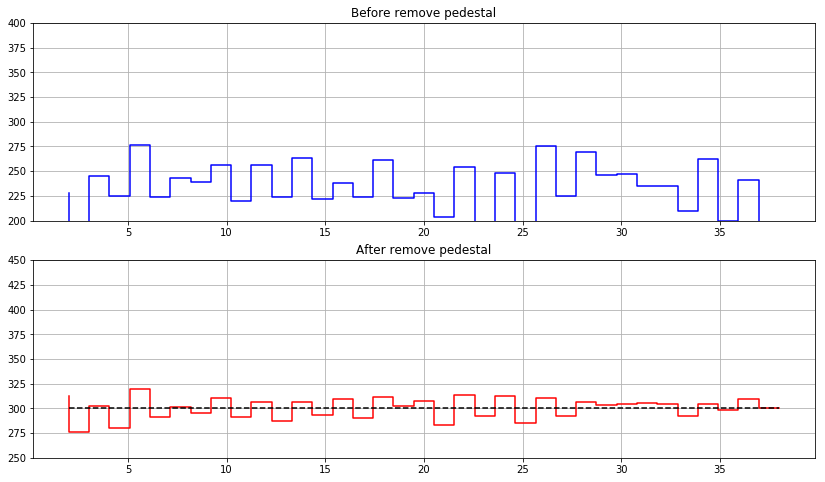

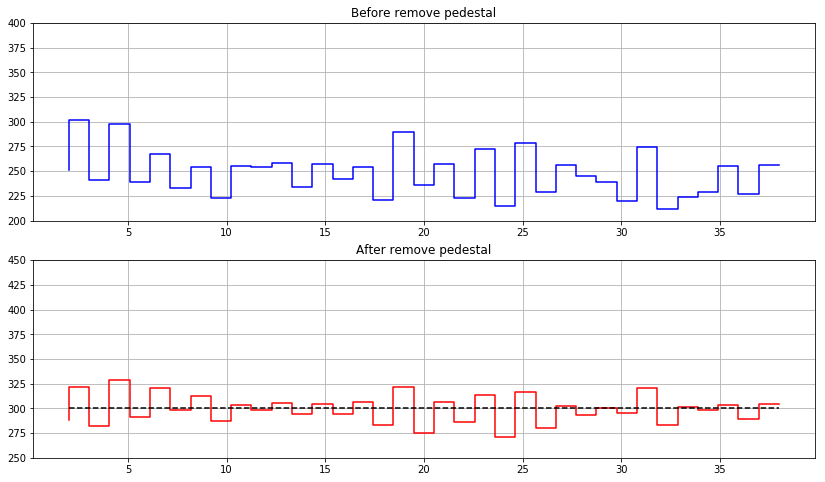

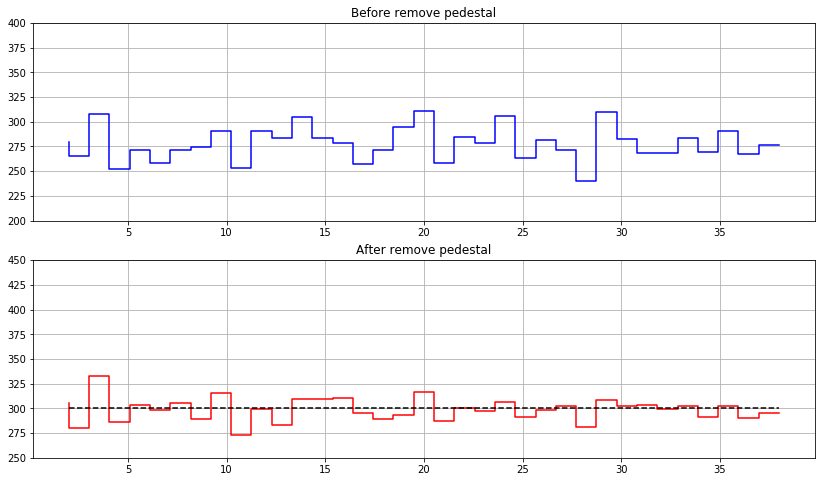

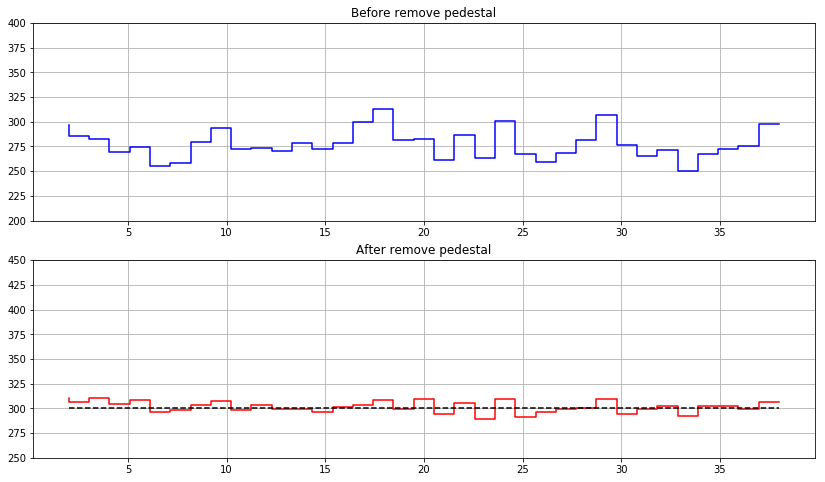

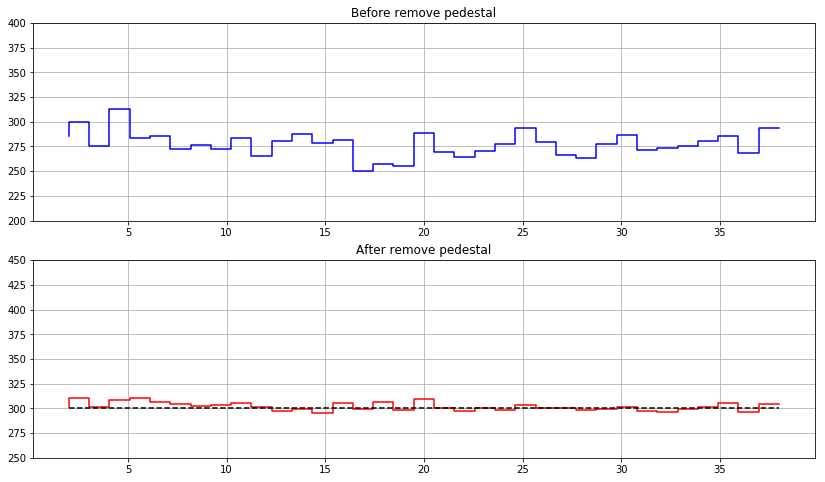

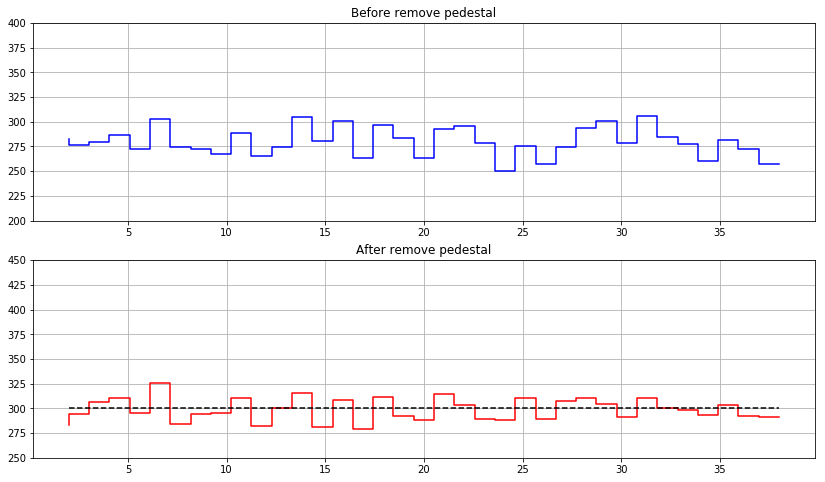

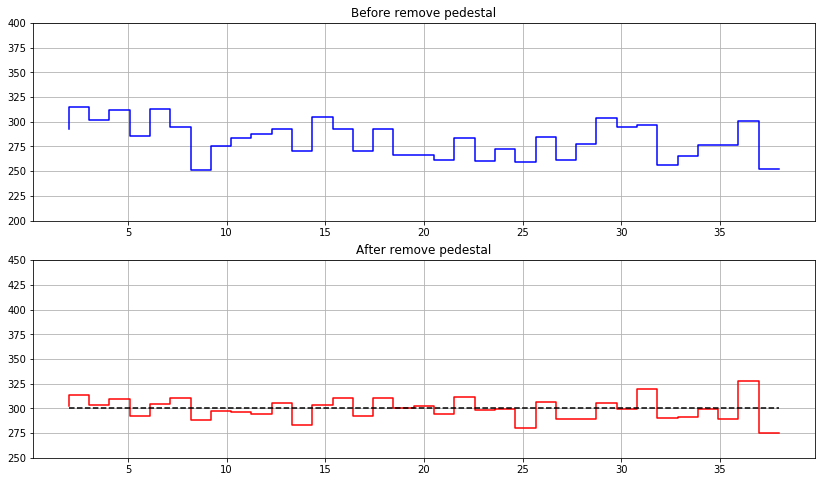

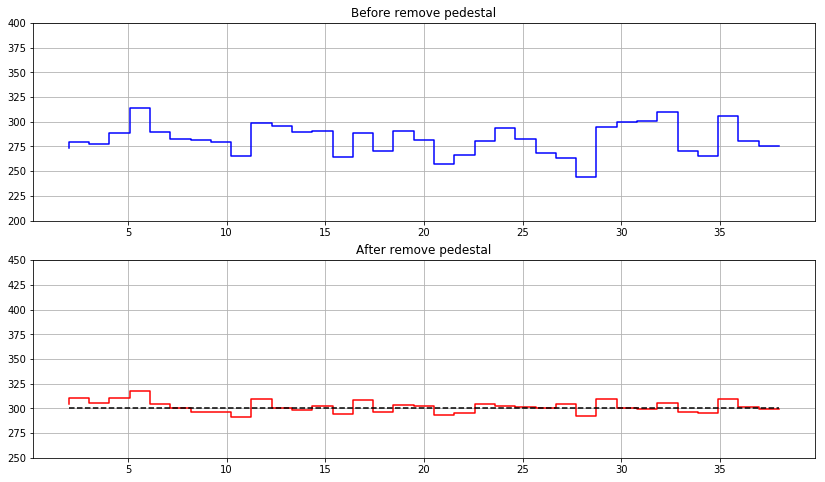

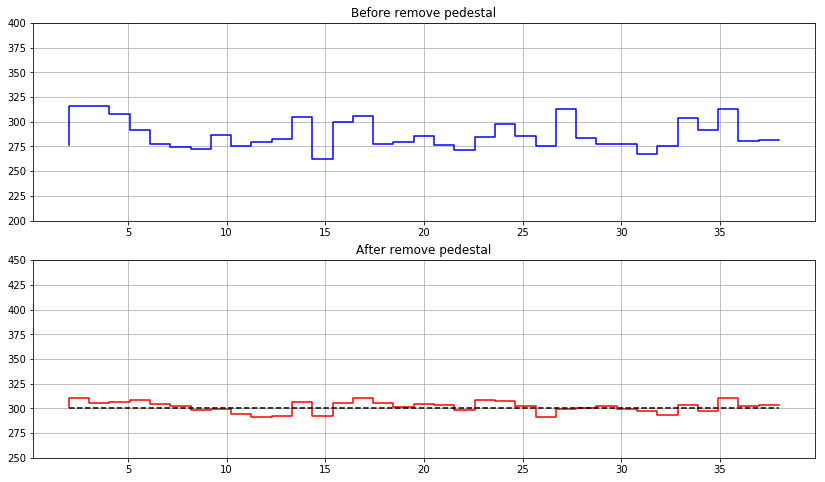

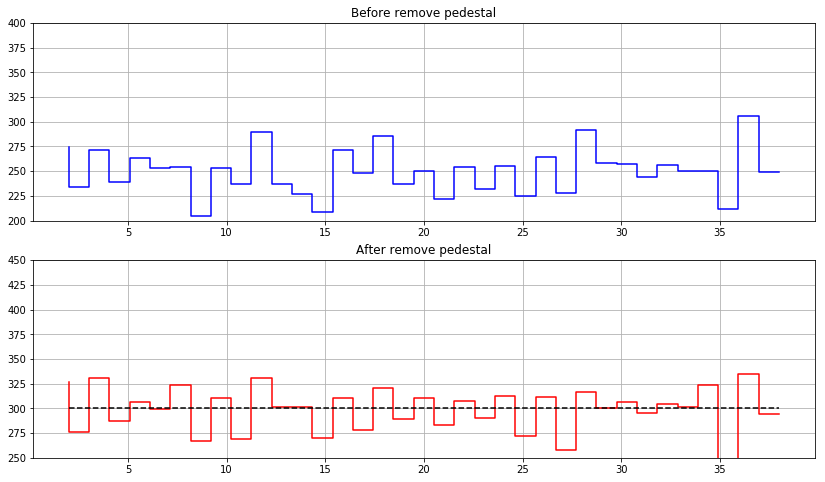

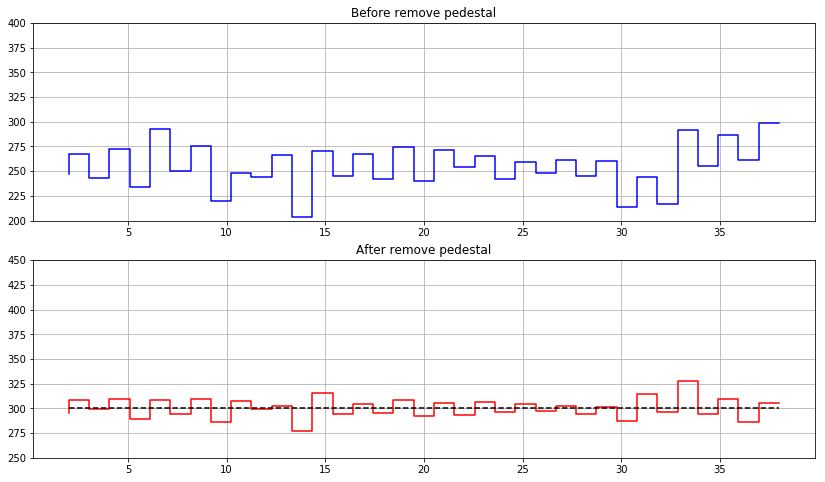

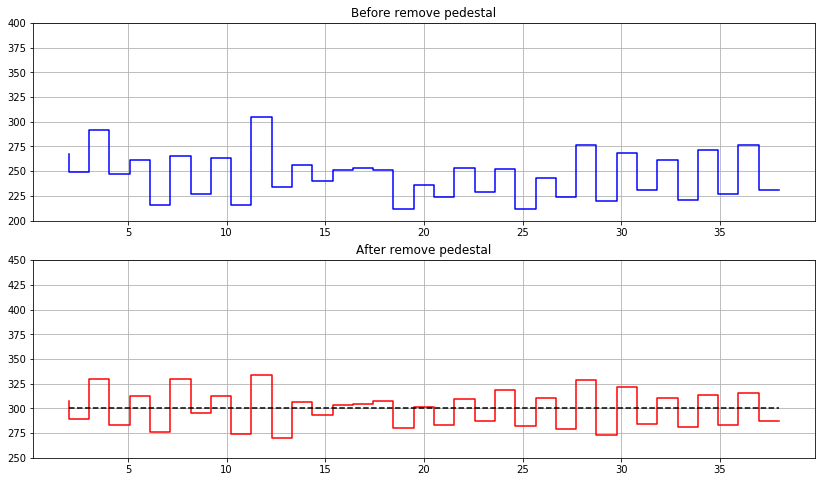

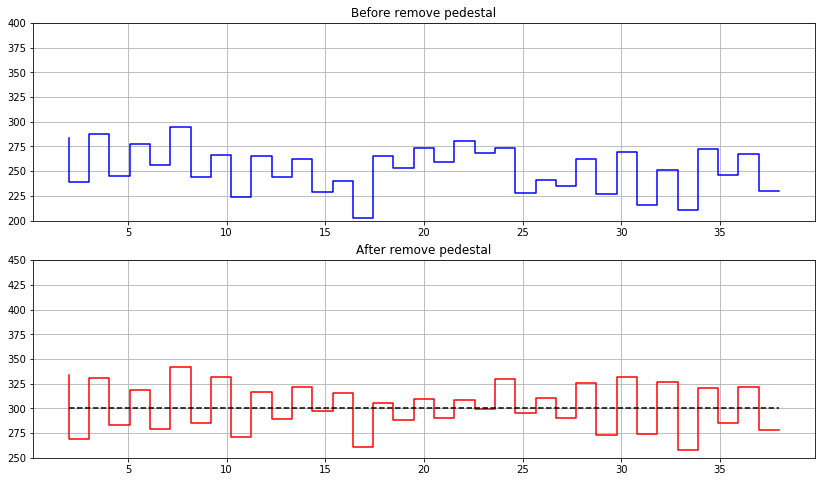

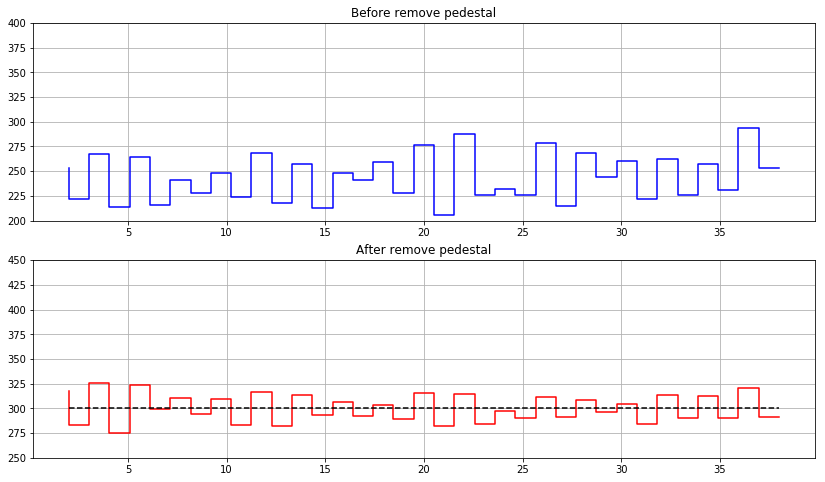

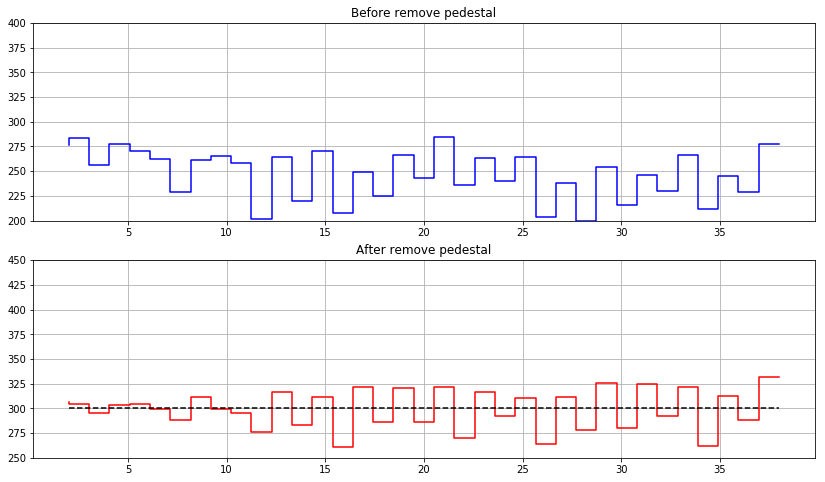

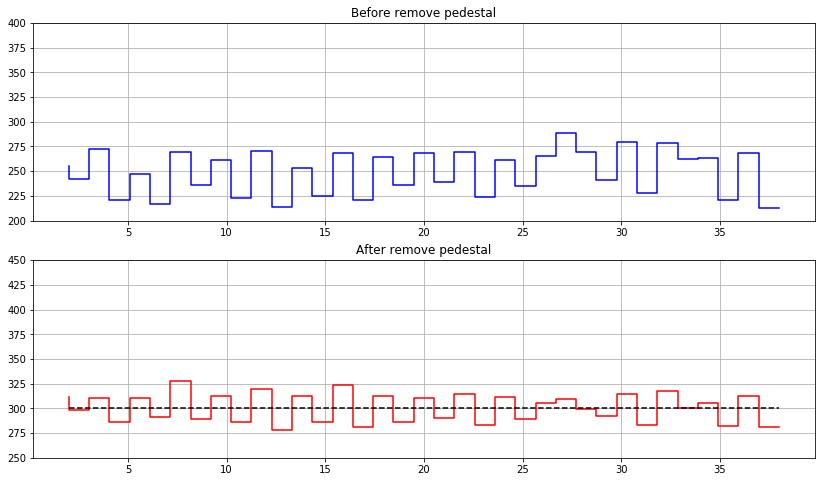

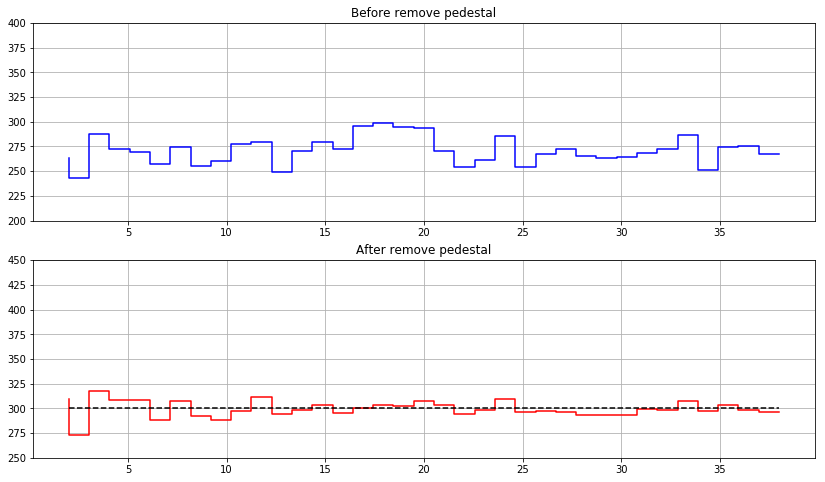

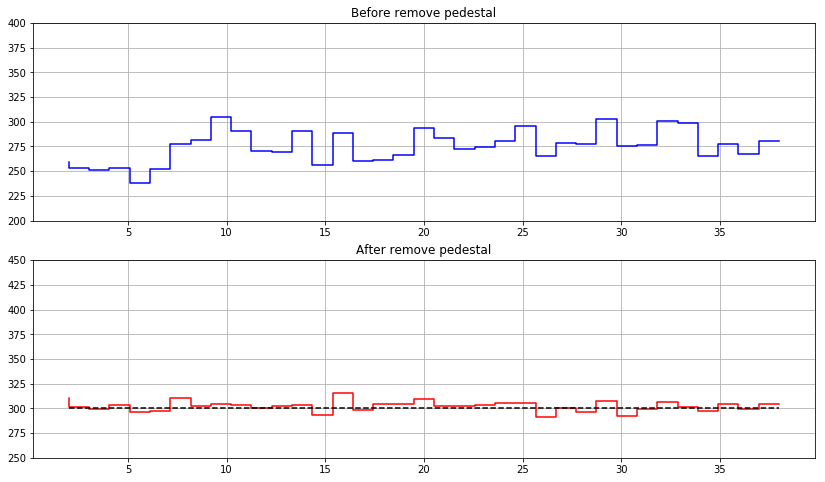

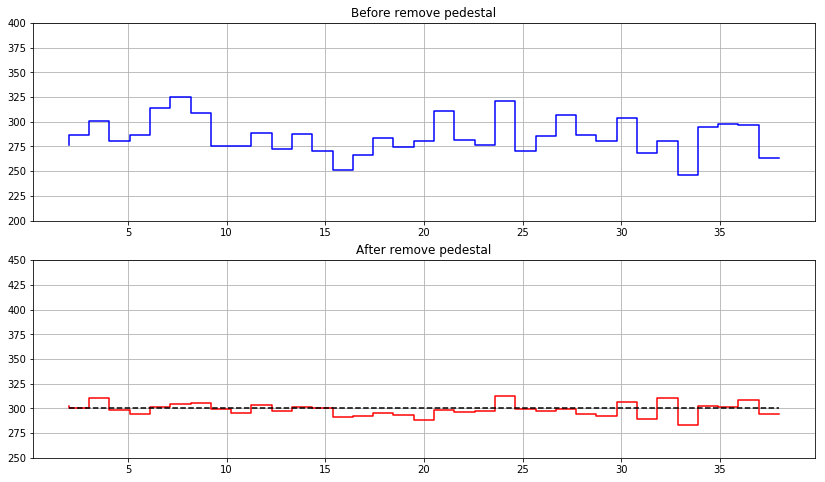

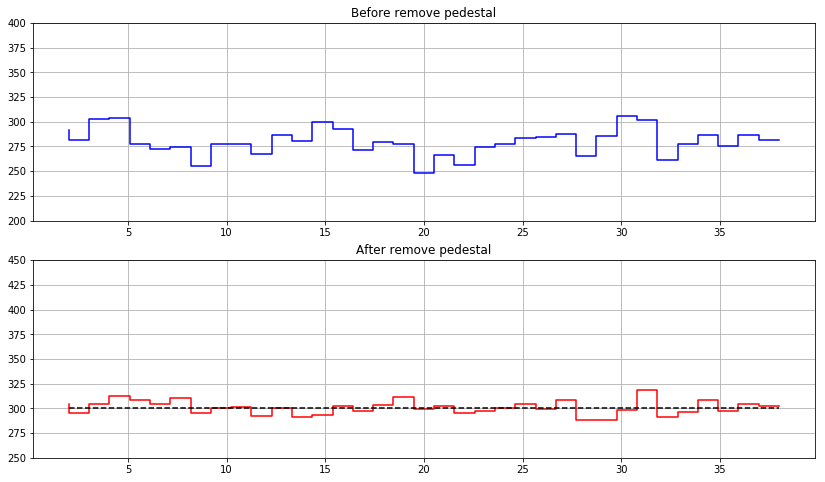

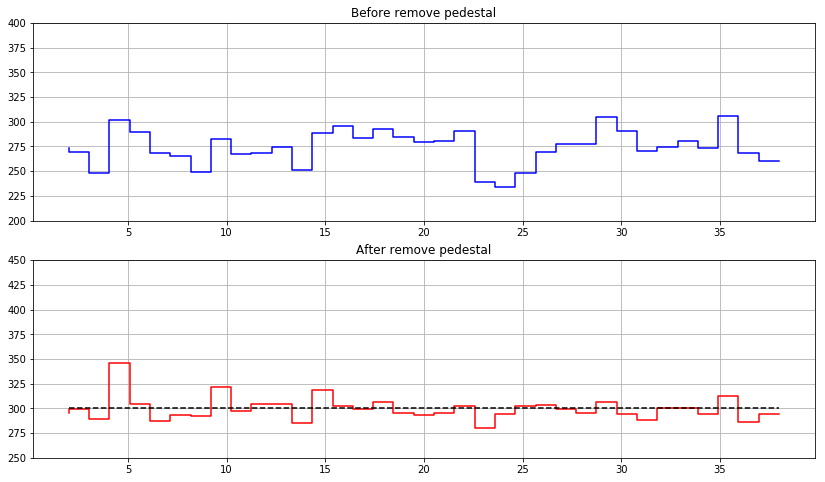

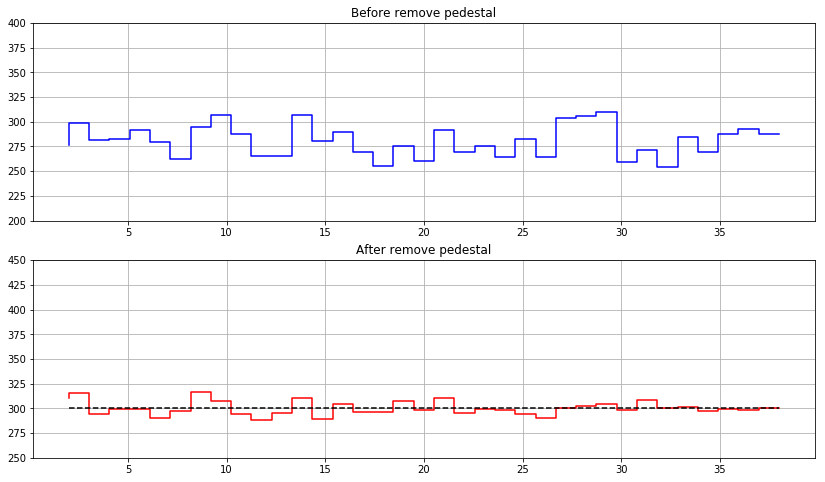

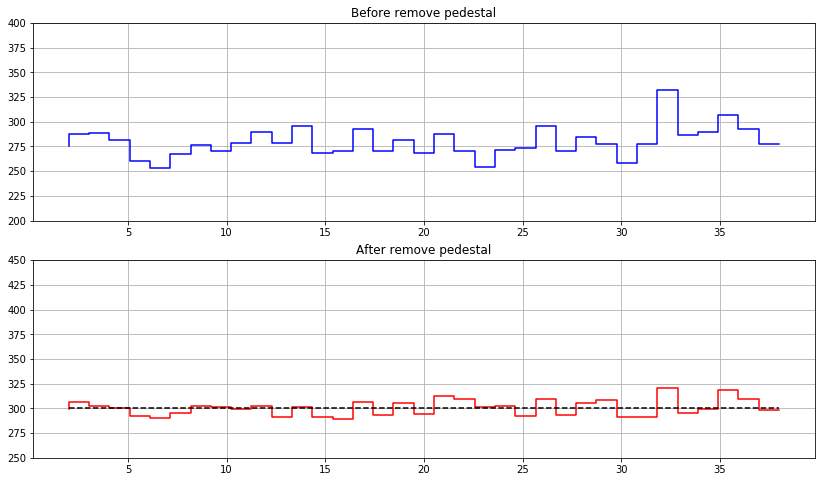

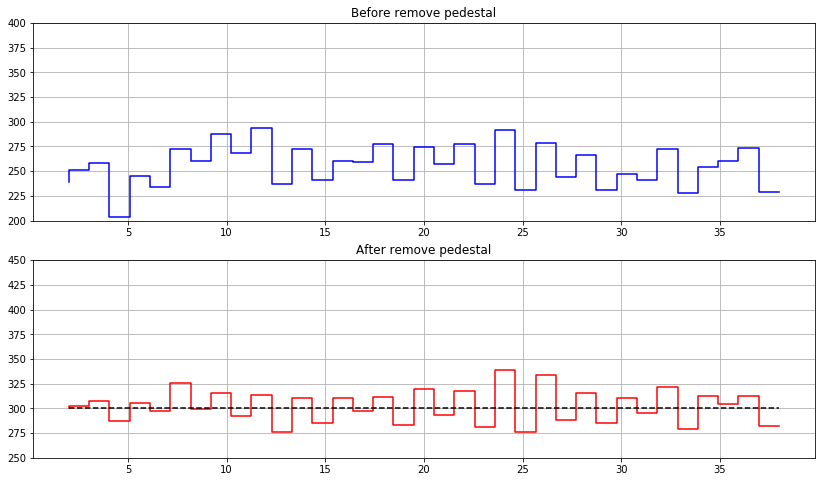

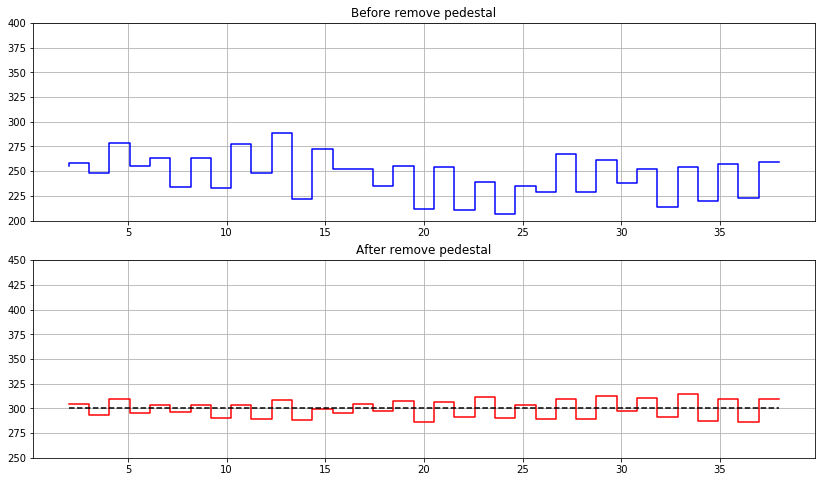

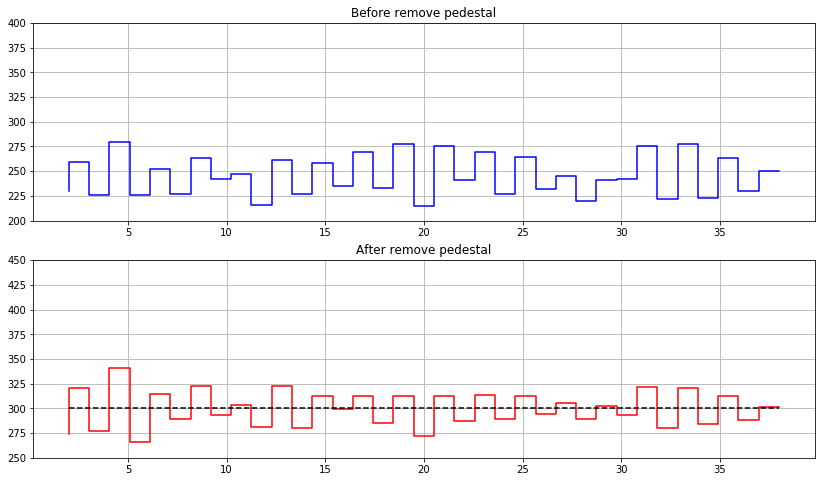

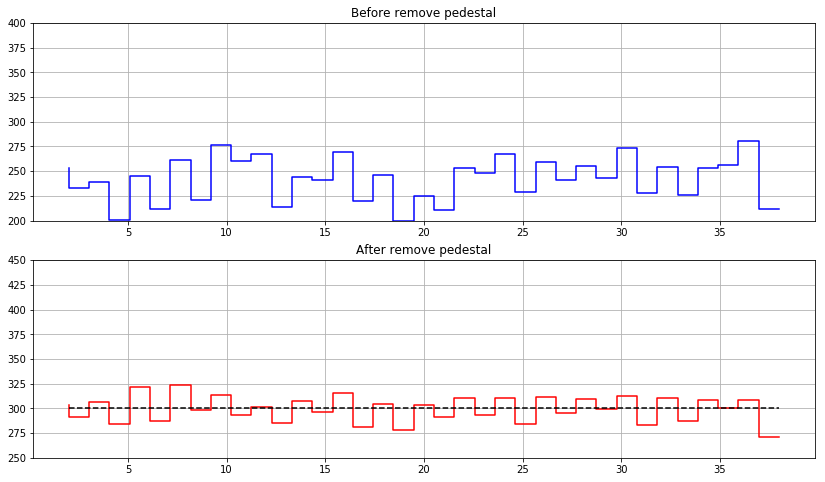

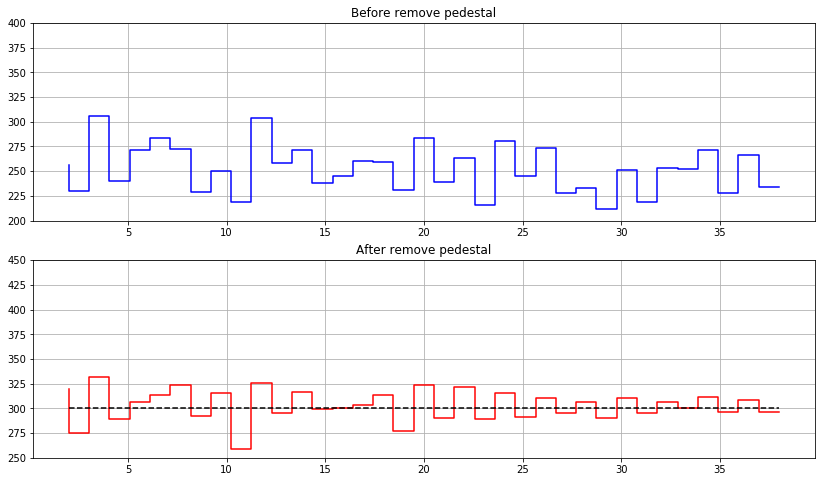

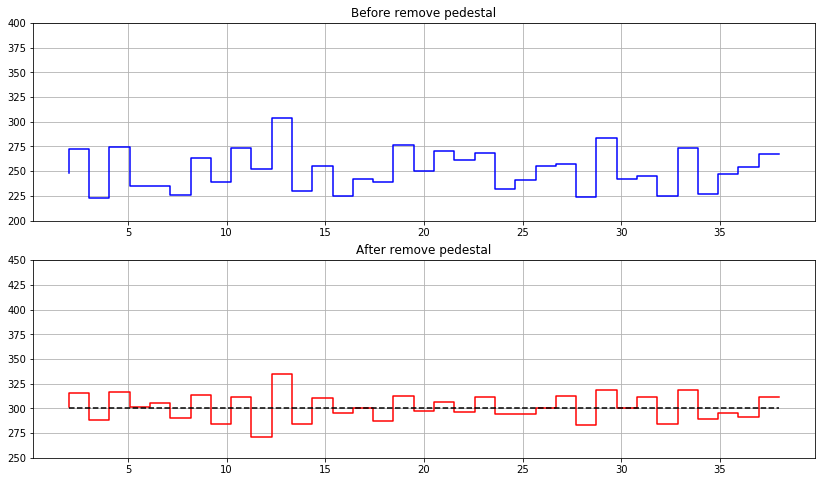

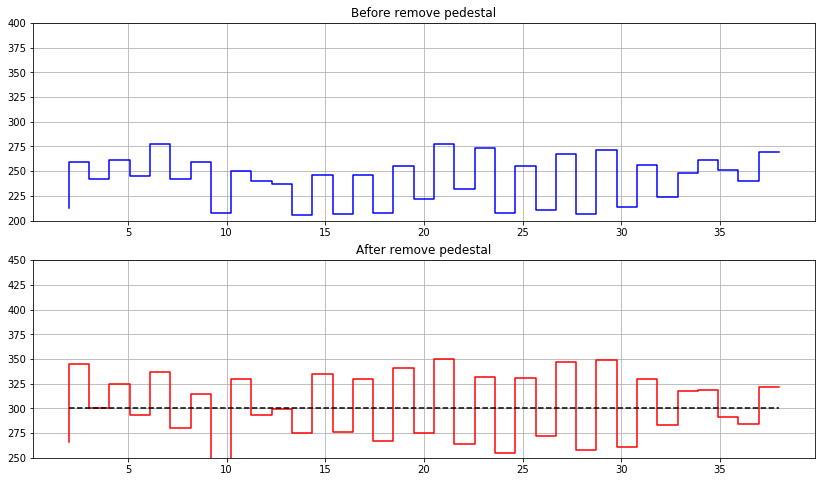

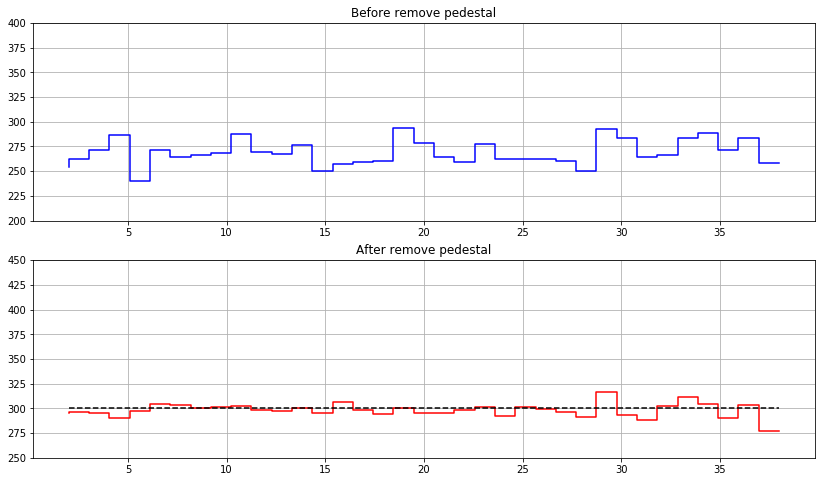

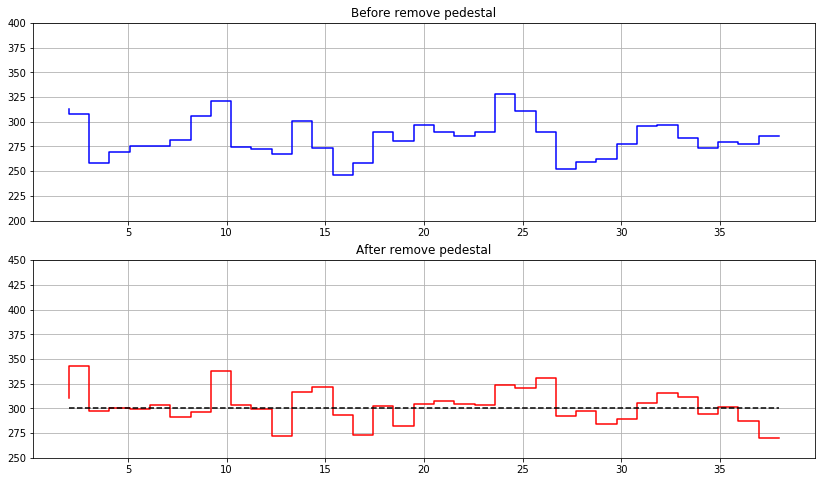

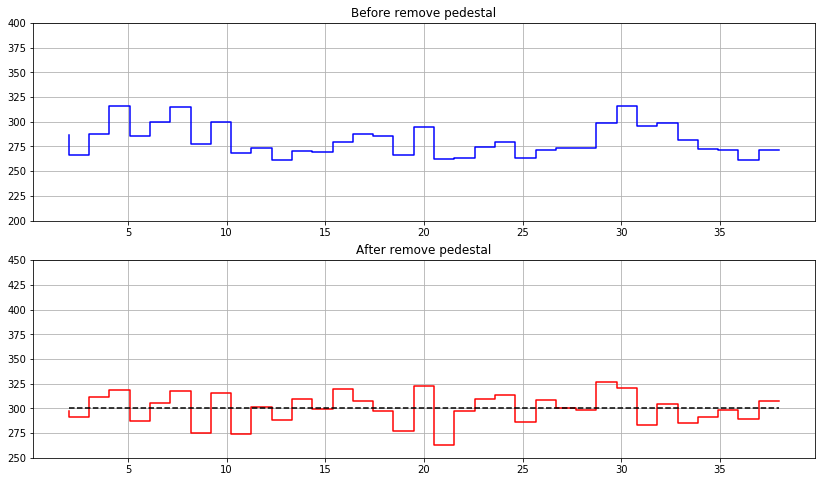

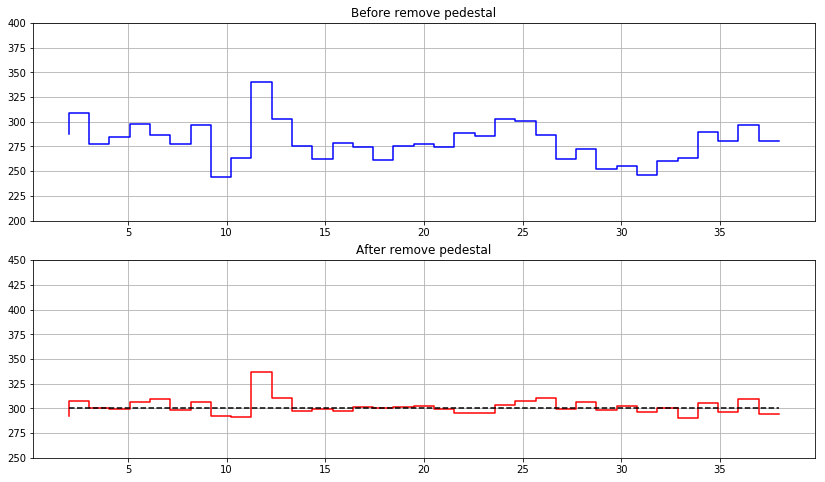

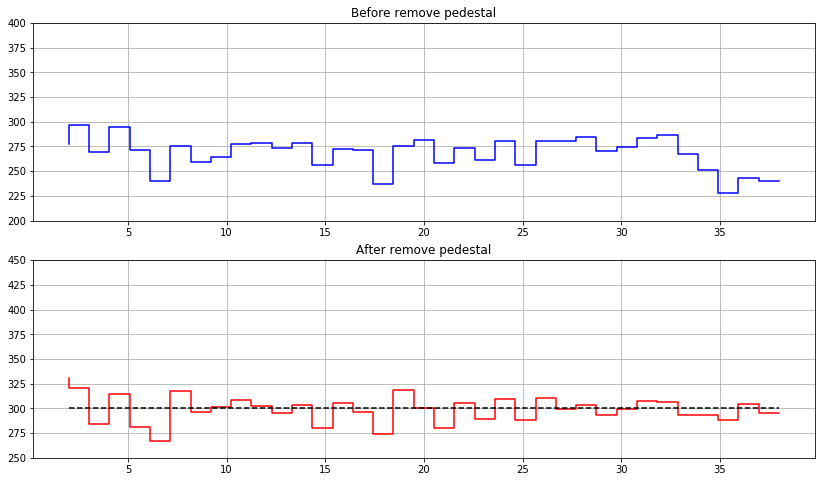

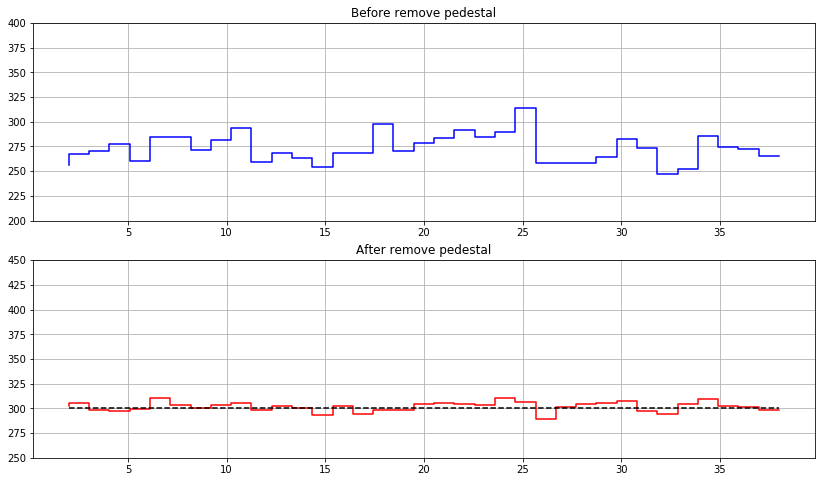

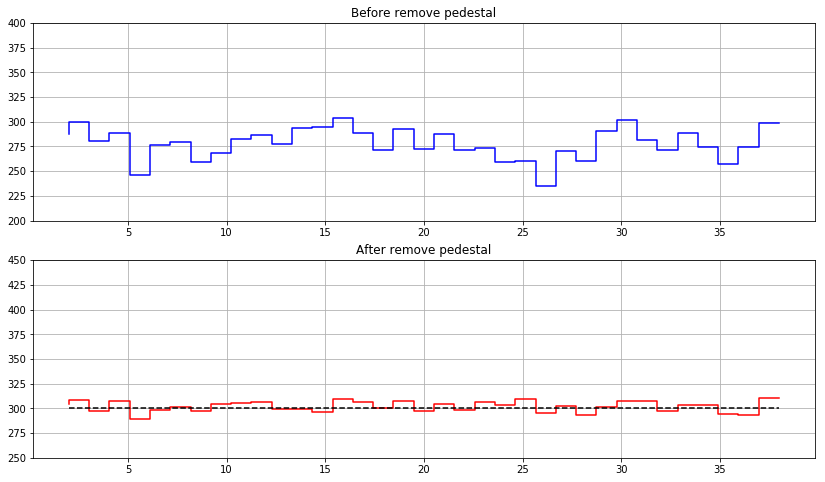

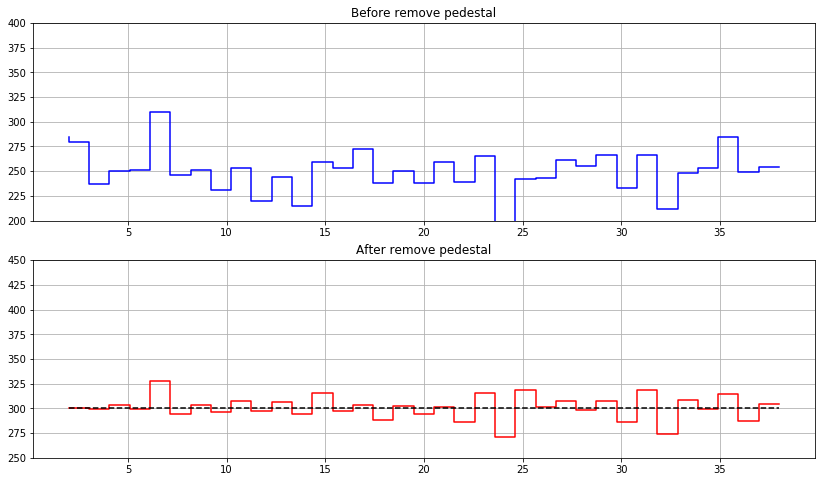

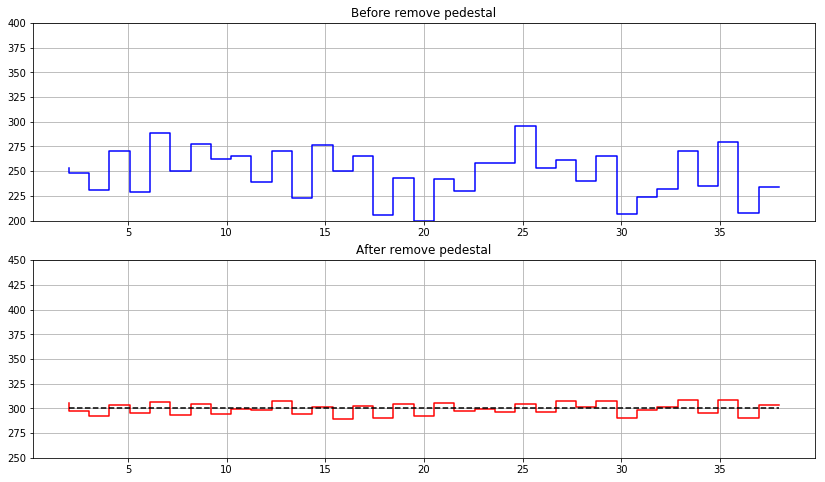

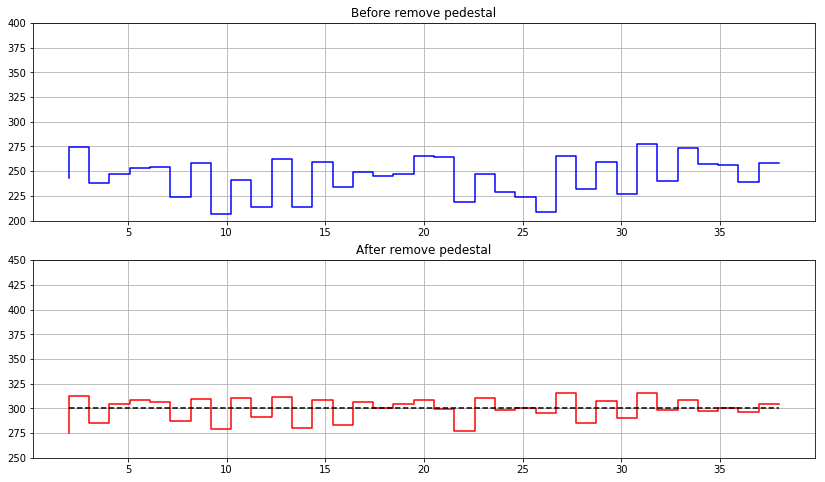

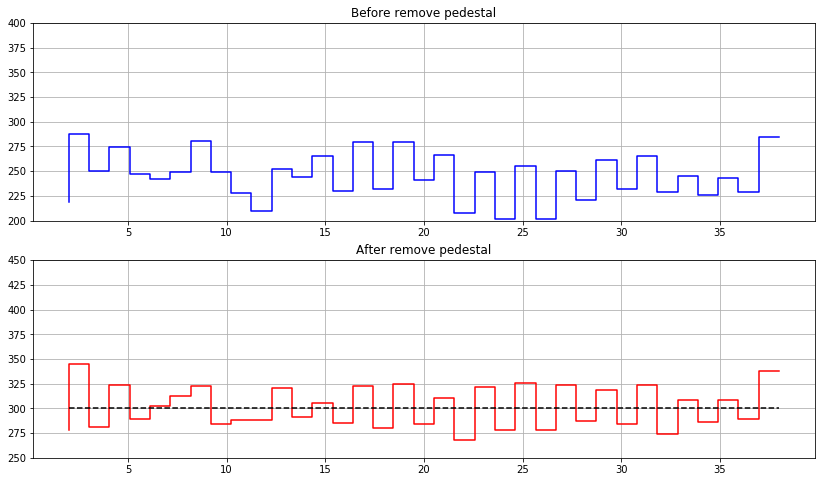

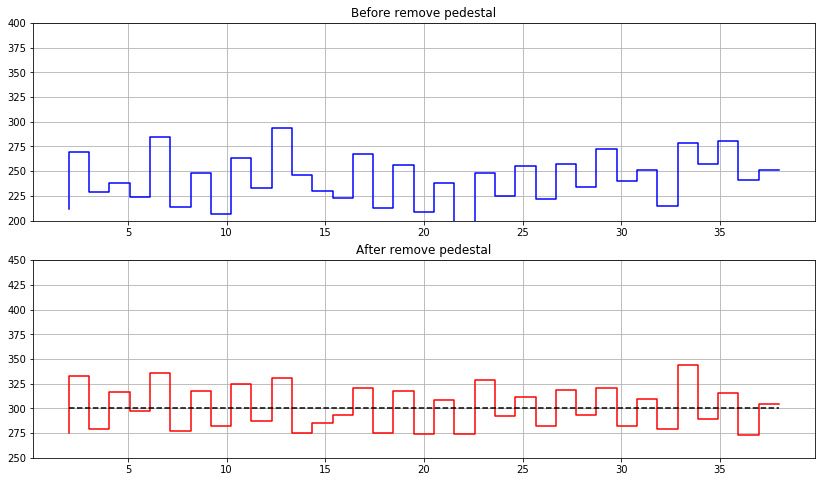

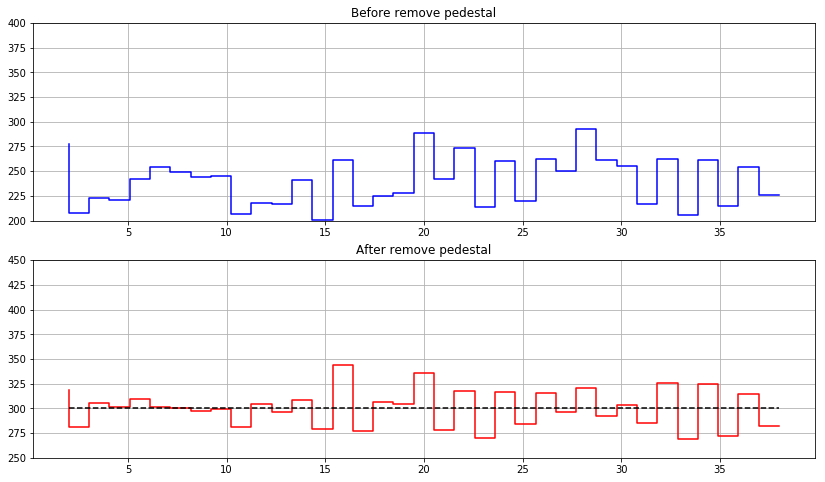

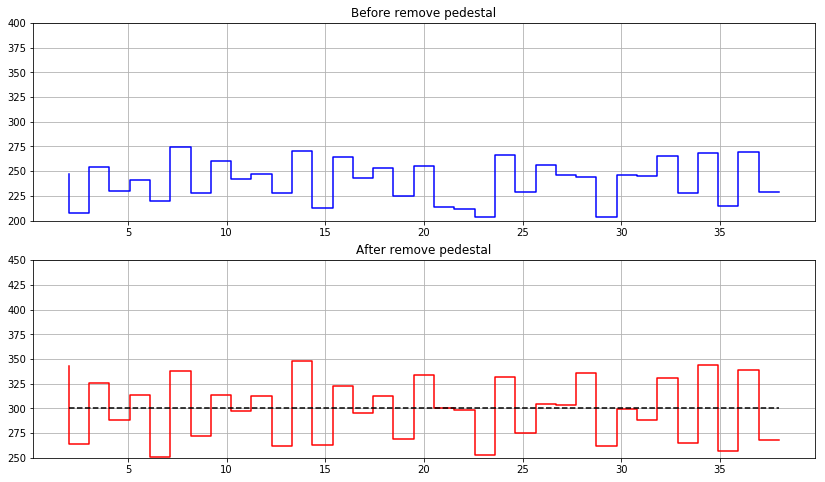

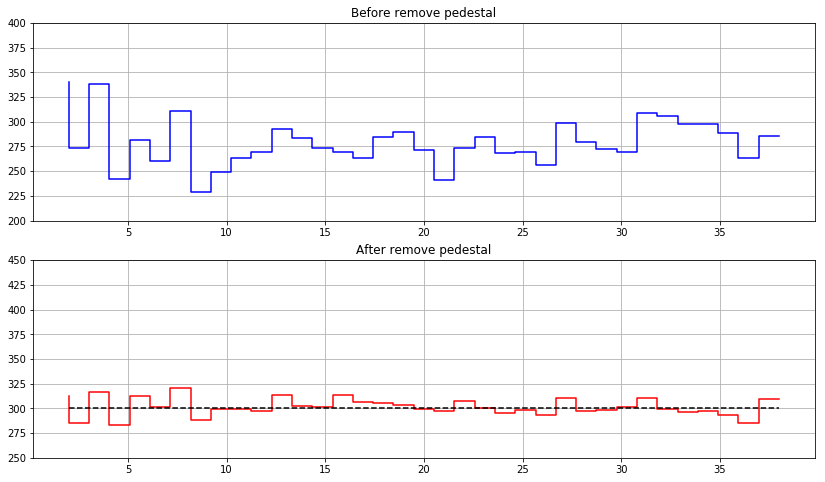

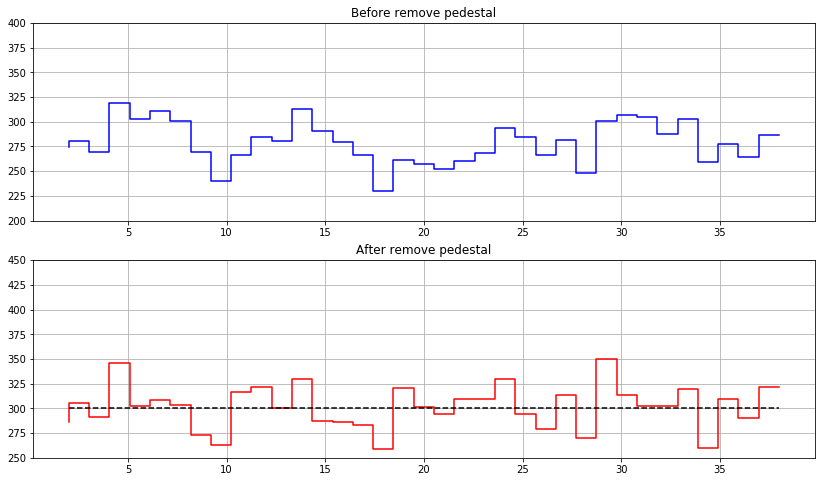

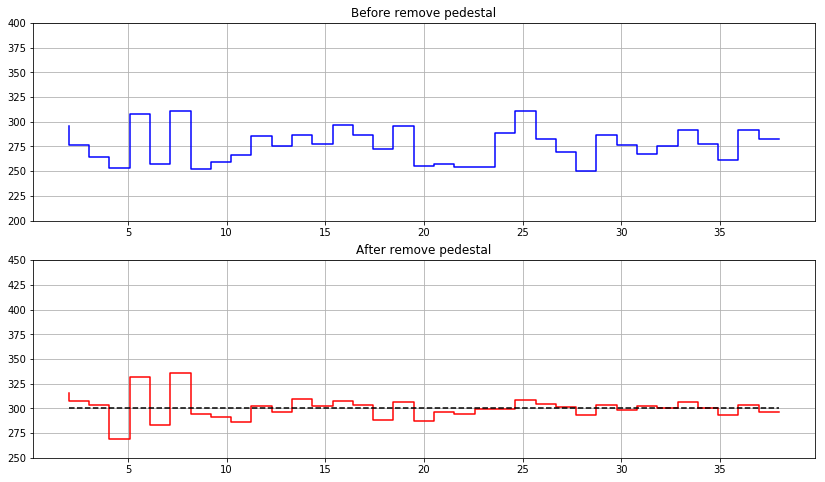

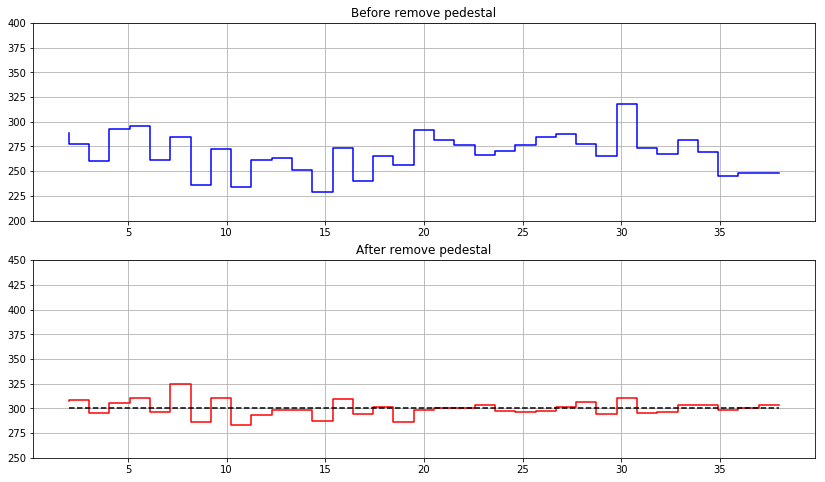

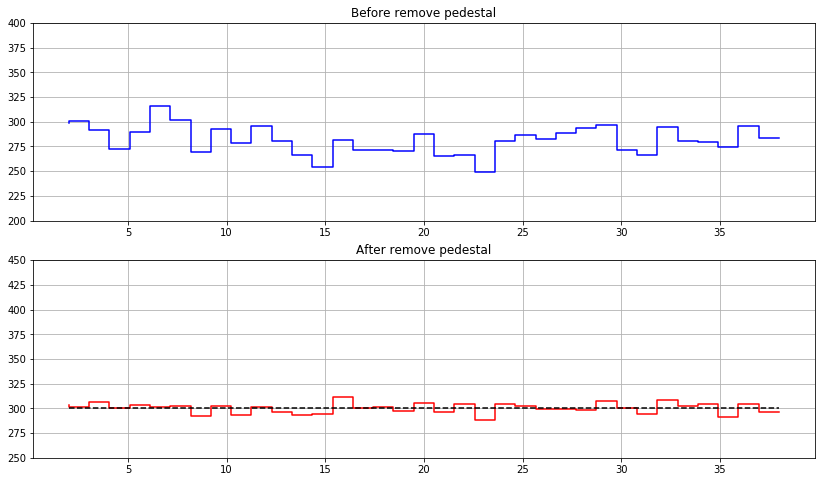

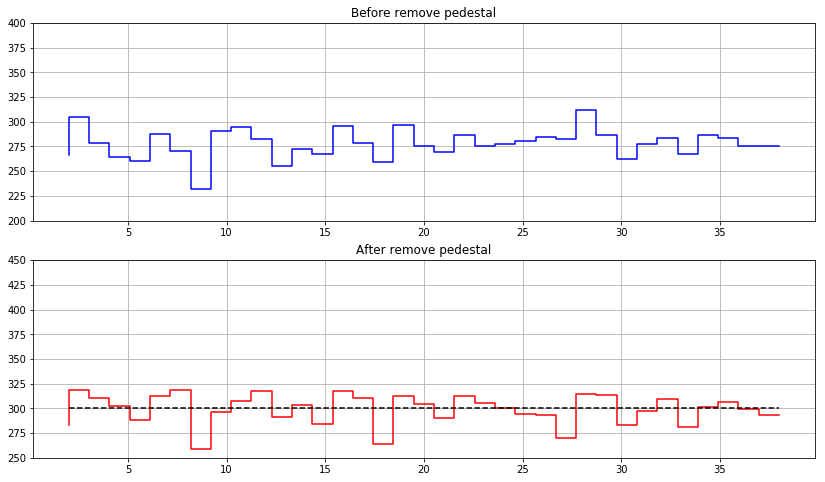

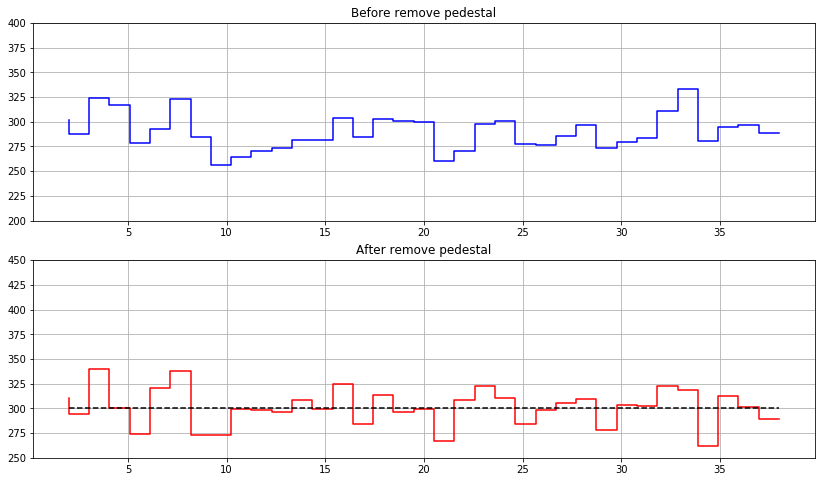

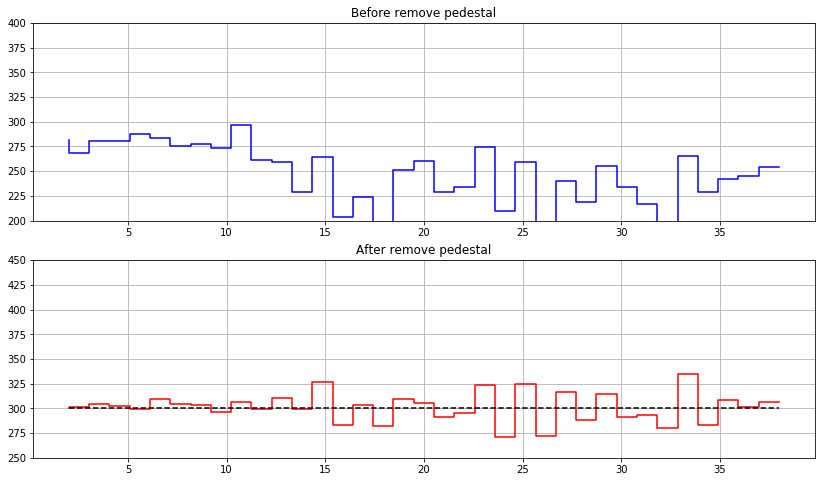

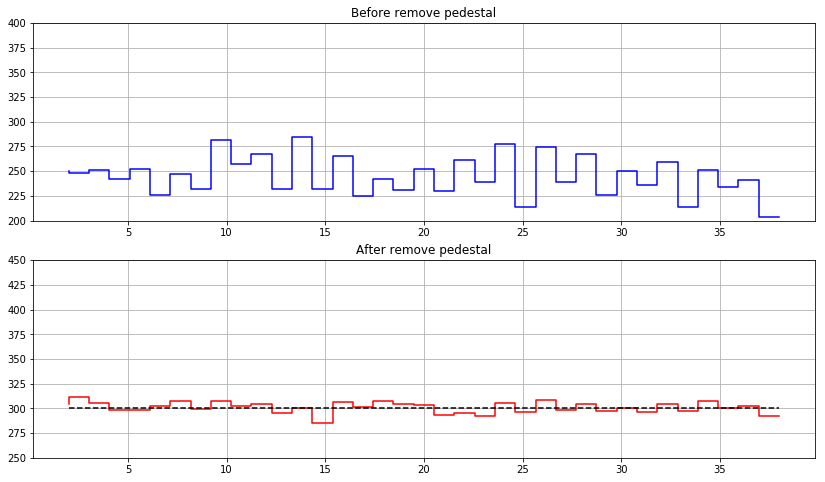

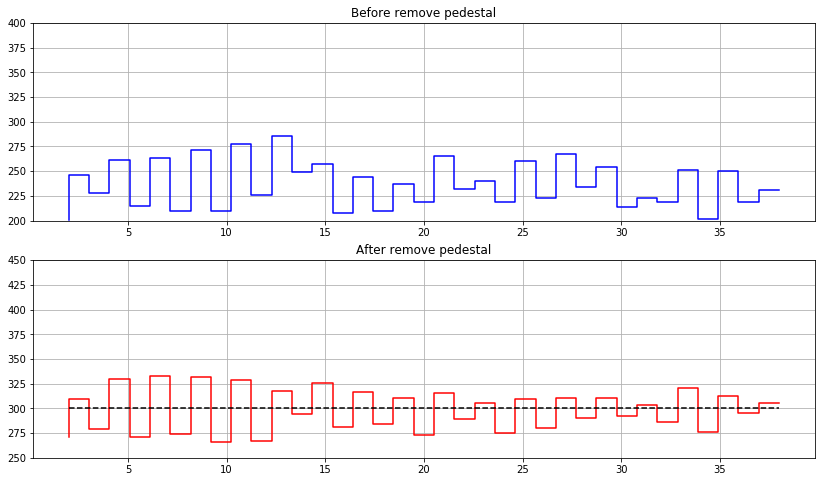

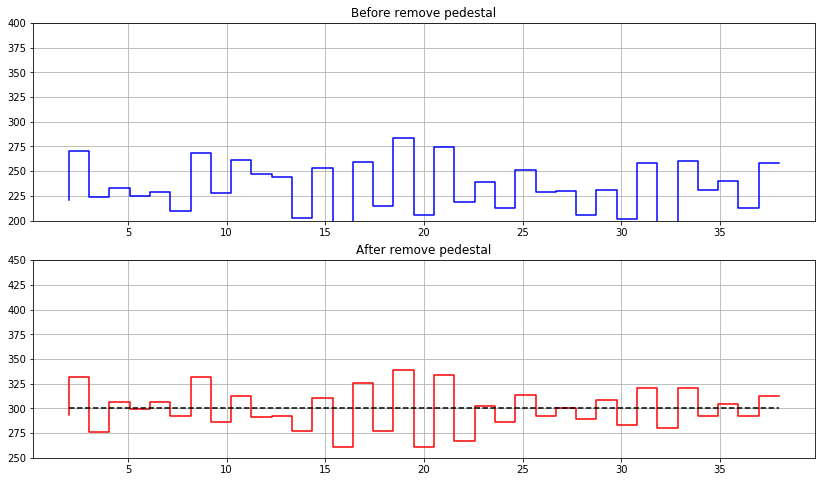

In [43]:
plt.rcParams['figure.figsize'] = (14, 8)

reader = LSTEventSource(input_url=path_to_data)
seeker = EventSeeker(reader)
pixel = 0
hg = 0
lg = 1
N = 55

waveform_before_remove_pedestal = np.zeros((N, 2, 7, 40))
waveform_after_remove_pedestal = np.zeros((N, 2, 7, 40))

for i in range(3500, 3500+N):
    nr = 1
    t = np.linspace(2, 38, 36)
    ev = seeker[i]
    fig, ax = plt.subplots(2, 1)
    waveform_before_remove_pedestal[i-3500, hg, pixel, :] = ev.r0.tel[0].waveform[lg, nr * 7:(nr + 1) * 7, :][pixel]
    ax[0].step(t, ev.r0.tel[0].waveform[lg, nr * 7:(nr + 1) * 7, 2:38][pixel], color="blue")
    ax[0].set_ylim([200, 400])
    ax[0].grid()
    ax[0].set_title("Before remove pedestal")
    remove_pedestal(ev, ped, nr)
    ax[1].step(t, ev.r0.tel[0].waveform[lg, nr * 7:(nr + 1) * 7, 2:38][pixel], color="red")
    ax[1].plot([2, 38], [300, 300], 'k--')
    ax[1].set_ylim([250, 450])
    ax[1].grid()
    ax[1].set_title("After remove pedestal")
    plt.show()

In [31]:
reader = LSTEventSource(input_url=path_to_data)
seeker = EventSeeker(reader)
ev = seeker[3555]
print(ev.r0.tel[0].waveform[0, nr * 7:(nr + 1) * 7, :])

/home/pawel1/anaconda3/envs/cta-dev/lib/python3.6/site-packages/protozfits/__init__.py:56: UserWarning:         Multiple open zfits files at the same time are not supported.
        Reading from mutliple open tables at the same time will reset these
        tables continously and you will read always the same events.
        
  ''')


[[257 270 235 276 257 302 263 301 242 271 225 296 252 306 219 295 244 273
  247 293 261 290 251 270 236 317 253 286 252 314 258 298 294 290 273 291
  258 280 243 195]
 [285 314 236 315 260 325 279 301 277 303 268 278 267 340 279 300 251 328
  291 301 276 277 279 321 246 299 264 318 262 325 243 353 286 336 286 321
  227 333 270 178]
 [196 198 185 217 220 246 226 232 164 210 172 221 226 261 234 264 207 237
  209 231 194 259 207 240 169 273 180 235 212 203 184 242 213 257 220 250
  240 264 227 215]
 [203 241 202 234 198 260 227 263 220 283 238 250 216 232 231 269 203 243
  200 280 182 272 217 287 183 260 214 266 226 273 211 225 170 251 206 223
  197 249 253 369]
 [292 185 224 202 254 180 264 236 250 225 269 202 239 238 271 220 246 225
  243 210 228 222 289 248 252 203 275 235 275 231 268 212 267 225 253 209
  236 240 299 277]
 [305 216 279 263 279 249 259 220 257 259 219 205 249 229 274 244 284 212
  246 239 260 214 278 247 288 237 297 194 258 224 285 200 269 222 303 246
  293 234 275 254

In [43]:
print(ev)

{'count': 3554,
 'dl0': {'event_id': -1, 'obs_id': -1, 'tel': {}, 'tels_with_data': []},
 'dl1': {'tel': {}},
 'dl2': {'classification': {}, 'energy': {}, 'shower': {}},
 'inst': {'subarray': SubarrayDescription(name='MonteCarloArray', num_tels=0)},
 'lst': {'tel': {0: {'evt': {'cdts_data': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8),
                             'chips_flags': array([0, 0, 0, ..., 0, 0, 0], dtype=uint16),
                             'configuration_id': 1,
                             'counters': array([ 44,   0, 148, ...,   0,   0,   0], dtype=uint8),
                             'drs_tag': array([2172, 2166, 2183, ..., 1941, 1945, 1954], dtype=uint16),
                             'drs_tag_status': array([12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12